<a href="https://colab.research.google.com/github/viviannguyen222/TuongVy/blob/master/Predicting_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting stock market index using LSTM**

**1. Import libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
from pandas import DataFrame

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

**2. Import data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MSN.csv')

**3. Pre-Proccessing**

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

In [ ]:
df=df.drop(columns = ['Open','Ticker','High','Low','Volume', 'Open Interest'])
df.head(10)

,Close
Date/Time,
2017-12-25 09:15:00,73.1
2017-12-25 09:16:00,73.0
2017-12-25 09:18:00,73.5
2017-12-25 09:20:00,73.1
2017-12-25 09:21:00,73.0
2017-12-25 09:22:00,73.1
2017-12-25 09:23:00,73.1
2017-12-25 09:27:00,73.3
2017-12-25 09:30:00,73.5


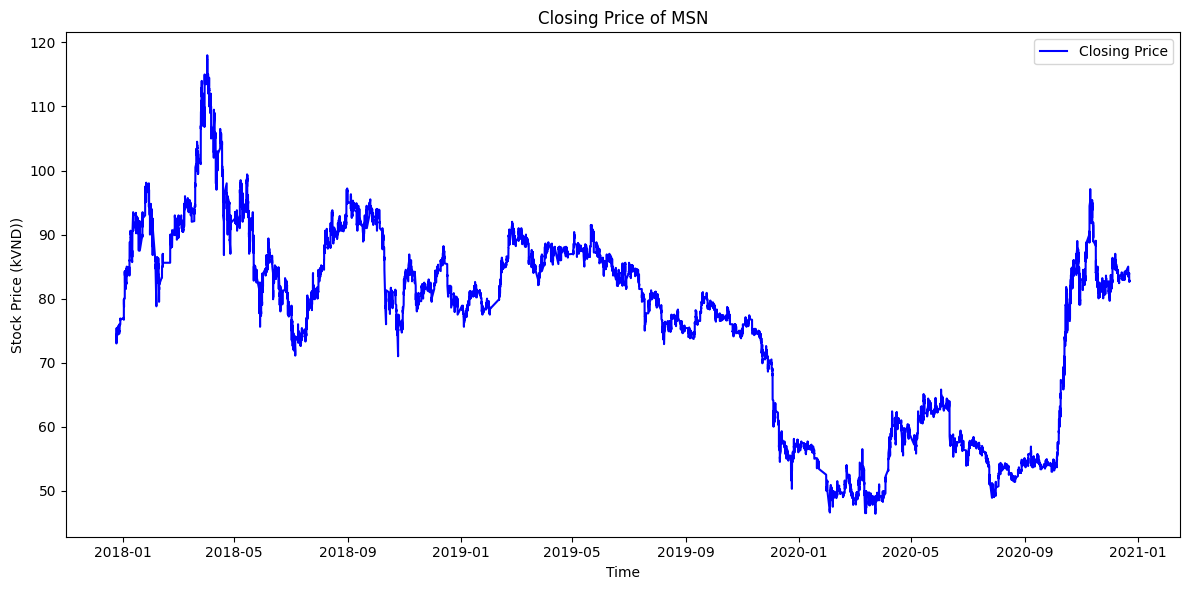

In [ ]:
# Visualizing Closing Price of MSN
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Stock Price (kVND))')
plt.title('Closing Price of MSN')
plt.legend()
plt.tight_layout()
plt.show()

=> Closing Price of MSN significantly fluctuated from 2018 to 2021. It is clear that in the period 2019-2020, the closing price of this stock had a decreasing trend due to Covid-19 pandemic. In remaining years, closing price of MSN increased again, and reached at over 100 kVND in 2021.

**4. Spliting data for training and testing**

In [ ]:
data=df.values
train_data = data[:10000]
test_data = data[10000:]

In [ ]:
# Standalized data
sc=MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [ ]:
x_train, y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0])
  y_train.append(sc_train[i,0])

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

**5. Building model and traning**

In [ ]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(x_train.shape[1],1), return_sequences = True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) # Avoiding biased data
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [ ]:
save_model=('/content/drive/My Drive/Colab Notebooks/save_model.hdf5')
best_model=ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')
model.fit(x_train, y_train, epochs=100, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.07701, saving model to /content/drive/My Drive/Colab Notebooks/save_model.hdf5
199/199 - 26s - loss: 0.0770 - 26s/epoch - 128ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.07701 to 0.05964, saving model to /content/drive/My Drive/Colab Notebooks/save_model.hdf5
199/199 - 24s - loss: 0.0596 - 24s/epoch - 121ms/step
Epoch 3/100

Epoch 3: loss improved from 0.05964 to 0.05187, saving model to /content/drive/My Drive/Colab Notebooks/save_model.hdf5
199/199 - 24s - loss: 0.0519 - 24s/epoch - 121ms/step
Epoch 4/100

Epoch 4: loss improved from 0.05187 to 0.04582, saving model to /content/drive/My Drive/Colab Notebooks/save_model.hdf5
199/199 - 22s - loss: 0.0458 - 22s/epoch - 110ms/step
Epoch 5/100

Epoch 5: loss improved from 0.04582 to 0.03829, saving model to /content/drive/My Drive/Colab Notebooks/save_model.hdf5
199/199 - 24s - loss: 0.0383 - 24s/epoch - 120ms/step
Epoch 6/100

Epoch 6: loss improved from 0.03829 to 0.03143, saving model to /content/drive/My Drive/Colab Notebooks/save_model.hdf5
199/199 - 23s - loss: 0.0314 - 23s/epoch - 118ms/step
Epoch 7/100

Epoch 7: loss improved from 0.03143 to 0.02544, saving model to 

In [ ]:
y_train=sc.inverse_transform(y_train)
final_model=load_model('/content/drive/My Drive/Colab Notebooks/save_model.hdf5')
y_train_predict = final_model.predict(x_train)
y_train_predict=sc.inverse_transform(y_train_predict)

311/311 [==============================] - 12s 36ms/step


In [ ]:
test=df[len(train_data)-50:].values
test=test.reshape(-1,1)
sc_test=sc.transform(test)

x_test=[]
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

y_test = data[10000:]
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

3918/3918 [==============================] - 133s 34ms/step


<ipython-input-194-4954c269b449>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Predicting'] = y_train_predict
<ipython-input-194-4954c269b449>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Predicting'] = y_test_predict


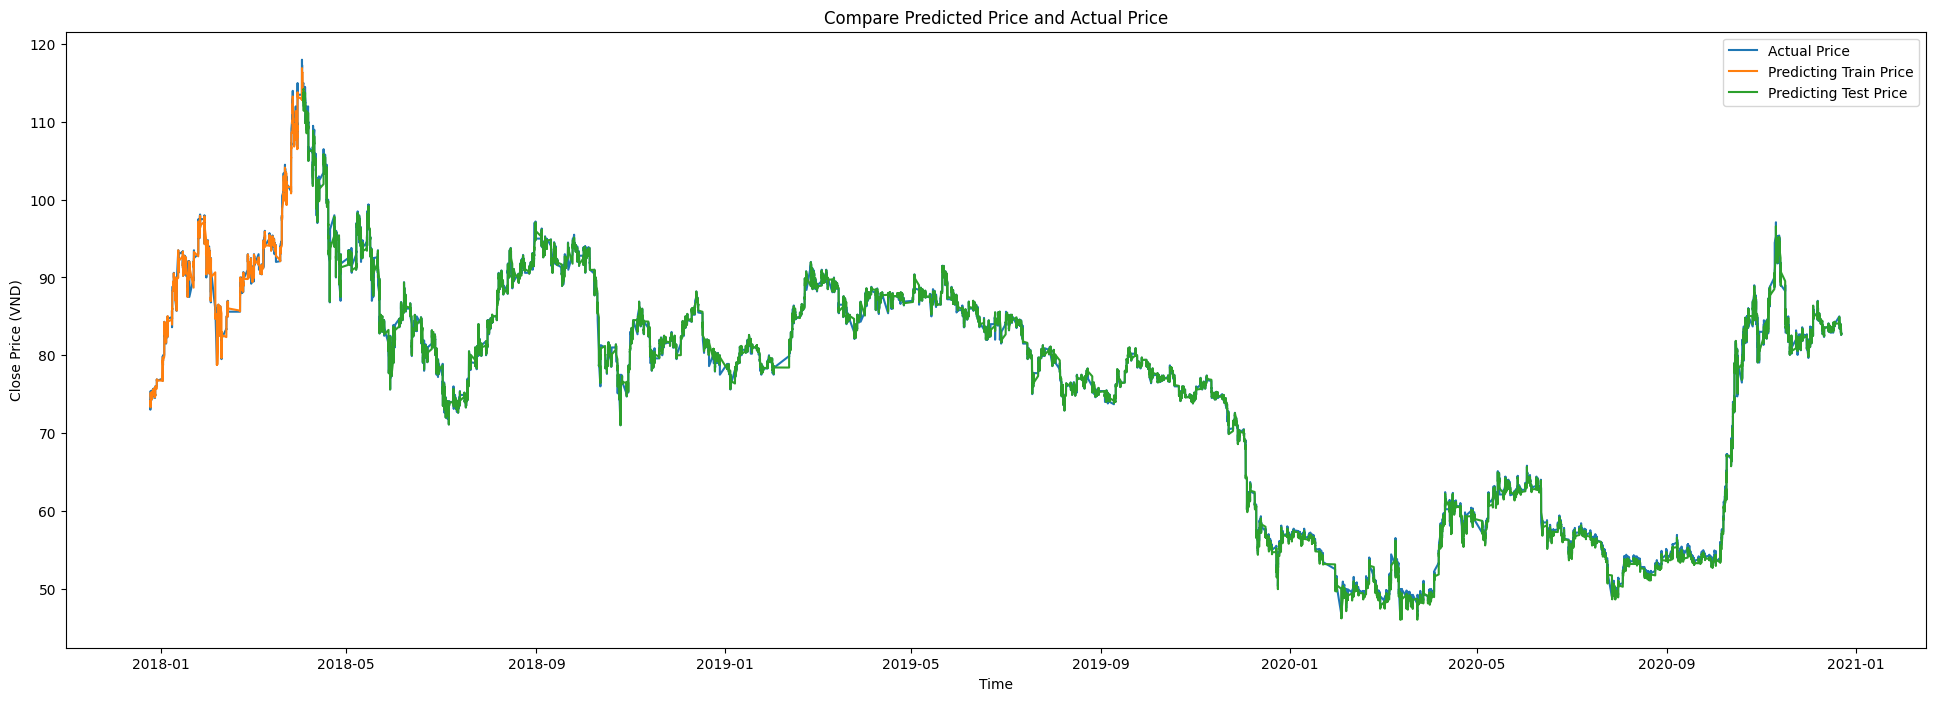

In [ ]:
train_data1 = df[50:10000]
test_data1 = df[10000:]

plt.figure(figsize=(24,8))
plt.plot(df,label='Actual Price')
train_data1['Predicting'] = y_train_predict
plt.plot(train_data1['Predicting'], label='Predicting Train Price')
test_data1['Predicting'] = y_test_predict
plt.plot(test_data1['Predicting'], label='Predicting Test Price')
plt.title('Compare Predicted Price and Actual Price')
plt.xlabel('Time')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.show()

In [ ]:
print('Suitability of the training set: ', r2_score(y_train, y_train_predict))

print('Mean absolute error: ', mean_absolute_error(y_train, y_train_predict))

print('Mean absolute percentage error: ', mean_absolute_percentage_error(y_train, y_train_predict))

Suitability of the training set:  0.9982496057964385
Mean absolute error:  0.2243246665456192
Mean absolute percentage error:  0.002339451479572382


In [ ]:
train_data1

,Close,Predicting
Date/Time,,
2017-12-25 10:55:00,74.1,74.126320
2017-12-25 10:57:00,74.1,74.104530
2017-12-25 10:59:00,74.1,74.097992
2017-12-25 11:00:00,74.1,74.094185
2017-12-25 11:02:00,74.0,74.092247
...,...,...
2018-04-03 09:15:00,115.0,113.980476
2018-04-03 09:16:00,115.0,114.178970
2018-04-03 09:18:00,114.7,114.215271


In [ ]:
print('Suitability of testing set: ', r2_score(y_test, y_test_predict))

print('Mean absolute error of testing set: ', mean_absolute_error(y_test, y_test_predict))

print('Mean abs error percentage of testing set: ', mean_absolute_percentage_error(y_test, y_test_predict))

Suitability of testing set:  0.9996796791173177
Mean absolute error of testing set:  0.18385675774629104
Mean abs error percentage of testing set:  0.0028678127435641143


In [ ]:
test_data1

,Close,Predicting
Date/Time,,
2018-04-03 09:21:00,115.0,114.221550
2018-04-03 09:22:00,114.5,114.239441
2018-04-03 09:23:00,115.0,113.901108
2018-04-03 09:25:00,114.9,114.155991
2018-04-03 09:26:00,114.9,114.136841
...,...,...
2020-12-22 14:23:00,82.8,82.821167
2020-12-22 14:24:00,82.8,82.825134
2020-12-22 14:25:00,82.8,82.826225


**6. Conclusion**



> Prediction for Stock Market use LSTM Model has high accuracy, it is a good method for investors making the decisions in stock market. However, there are other factors affect on stock market's fluctuation such as corporations' performance, economic statuses, and external influences. Therefore, the investors should consider this method as a reference. In addition, the investors should comprehend the current market stock and according to own strategies to make wise investment decisions.






